In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [2]:
(x_train, _),(x_test, _) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [4]:
x_train = x_train.reshape((len(x_train),-1))
x_test = x_test.reshape((len(x_test), -1))

In [5]:
input_dim = x_train.shape[1]
encoding_dim = 32

In [6]:
input_img = Input(shape=(input_dim,))

In [7]:
encoded = Dense(encoding_dim, activation = "relu")(input_img)

In [8]:
decoded = Dense(input_dim, activation = "sigmoid")(encoded)

In [9]:
autoencoder = Model(input_img, decoded)

In [10]:
encoder = Model(input_img, encoded)

In [11]:
autoencoder.compile(optimizer = "adam", loss = "binary_crossentropy")

In [12]:
history = autoencoder.fit(x_train, x_train,
                         epochs = 25,
                         batch_size = 256,
                         shuffle = True,
                         validation_data = (x_test, x_test))

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3814 - val_loss: 0.1870
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1785 - val_loss: 0.1536
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1495 - val_loss: 0.1334
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1312 - val_loss: 0.1213
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1203 - val_loss: 0.1129
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1125 - val_loss: 0.1067
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1071 - val_loss: 0.1025
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1027 - val_loss: 0.0990
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1000 - val_loss: 0.0969
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0976 - val_loss: 0.0954
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0964 - val_loss: 0.0943
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [13]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step


In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

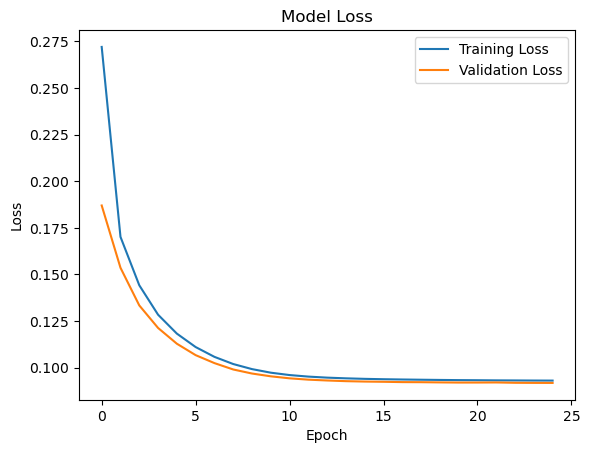

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [16]:
def plot_reconstruction(x_test, decoded_imgs, num_images=5):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1).imshow(
            x_test[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.subplot(2, num_images, i + 1 + num_images).imshow(
            decoded_imgs[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

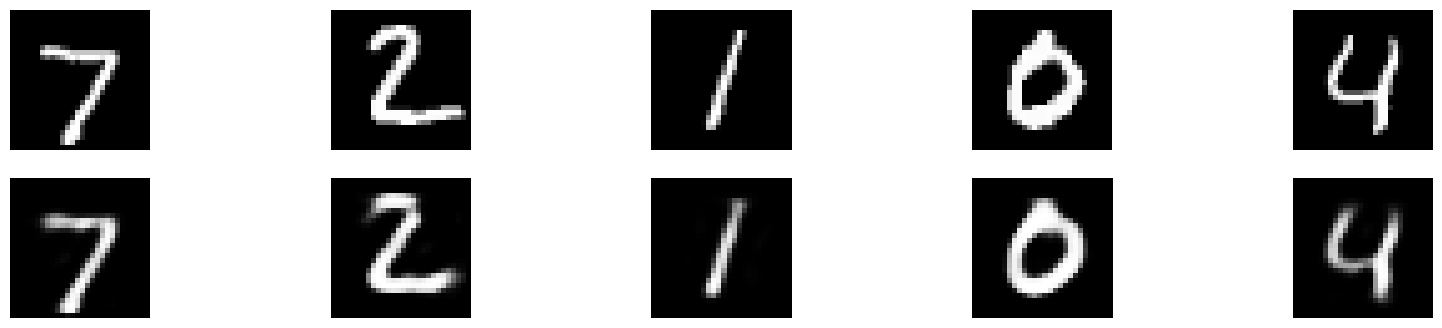

In [17]:
plot_reconstruction(x_test, decoded_imgs)